In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy import stats

In [40]:
from mpl_toolkits.mplot3d import *
import ipywidgets as widgets
from ipywidgets import interact, interactive, Dropdown
import matplotlib.animation as animation
from IPython.display import HTML

In [41]:
df = pd.read_csv('/Users/albert/Documents/GitHub/housing_analysis/house-data/train.csv')
df_test = pd.read_csv('/Users/albert/Documents/GitHub/housing_analysis/house-data/test.csv')

In [42]:
df = df[ df.select_dtypes(include=np.number).columns.tolist()]
df_test = df_test[ df_test.select_dtypes(include=np.number).columns.tolist()]

In [43]:
df.dropna(inplace=True)
df_test.dropna(inplace=True)

In [44]:
#GrLivArea: Above grade (ground) living area square feet

In [45]:
attribute = Dropdown(options = df.keys())
@interact(rank = (1, 6), attribute = attribute)
def f(rank, attribute):
    measured = df["SalePrice"]
    COLORS = ["red", "blue", "green", "orange", "yellow", "gray", "cyan", "purple"]
    model = {}
    xp = np.linspace(1, df[attribute].max()+df[attribute].mean()/4, 20)
    for i in range(1, rank+1):
        data_reg = np.polyfit(df[attribute], df["SalePrice"], i)
        predicted = np.polyval(data_reg, df[attribute].tolist())
        if i == 1:
            model[i] = [data_reg,
                             predicted,
                             stats.pearsonr(predicted, measured)[0]]
        
        
        elif i > 1:
            model[i] = [data_reg,
                             predicted,
                             stats.spearmanr(predicted, measured)[0]]
    
    fig = plt.figure(figsize=(14,9))
    ax = plt.axes()
    plt.scatter(df[attribute], df["SalePrice"], label = f"degree : correlation", color="black")
    for i in range(1, rank+1):
        ax.plot(xp, np.polyval(model[i][0], xp), label = f"{i} : {round(model[i][2], 5)}", color = COLORS[i-1] )
    
    ax.set_ylim(bottom=0, top = df["SalePrice"].max()+df["SalePrice"].mean()/4)
    ax.set_xlim(0, df[attribute].max()+df[attribute].mean()/4)
    ax.set_title("")
    ax.set_title(f"SalePrice vs {attribute}")
    ax.set_xlabel(f"{attribute}")
    ax.set_ylabel(f"SalePrice, {attribute}")
    ax.grid()
    ax.legend()
    return model

interactive(children=(IntSlider(value=3, description='rank', max=6, min=1), Dropdown(description='attribute', …

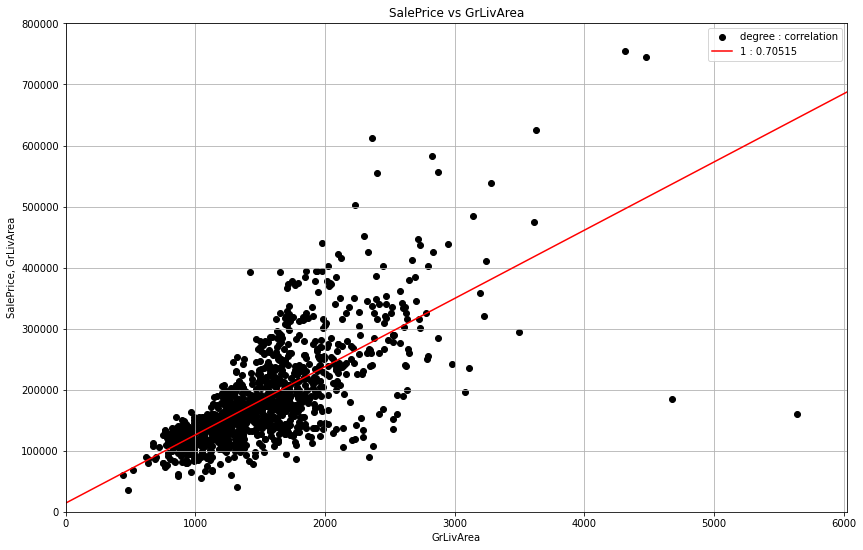

In [30]:
mod = f(1, "GrLivArea")